# Q1: Demonstration of Bayesian Inference
set n = 30, m = 0 and s = 1

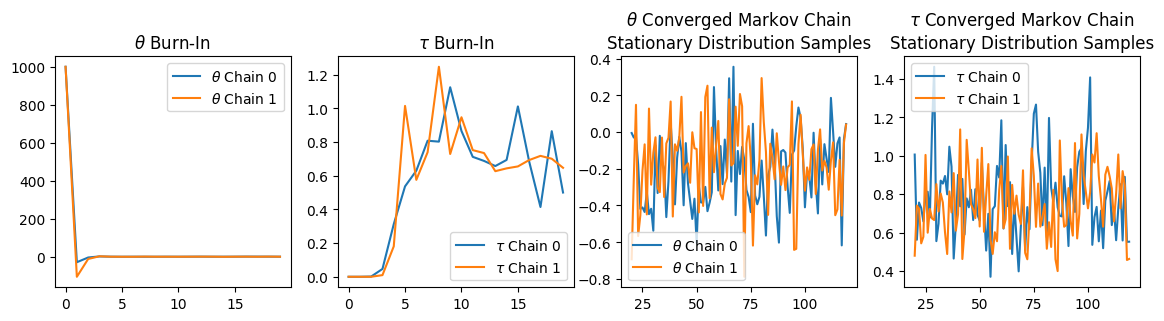

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a=n / 2 + 1, scale=2 / np.sum((x - theta[c, g - 1]) ** 2)).rvs()
        theta[c, g] = stats.norm(loc=np.mean(x), scale=1 / (tau[c, g] * n) ** 0.5).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();

# Q2

## i) Derive ull conditional distributions

The posterior for τ is : $$
p(\tau \mid \theta, x) \propto p(\tau) \cdot p(x \mid \theta, \tau)
$$

Result in:$$
\tau \mid \theta, x \sim \text{Gamma}\left(\frac{\alpha + n}{2}, \frac{\lambda + \sum_{i=1}^n (x_i - \theta)^2}{2}\right)
$$


The posterior for 𝜃 is: $$
p(\theta \mid \tau, x) \propto p(\theta) \cdot p(x \mid \theta, \tau)
$$

Result in : $$
\theta \mid \tau, x \sim N(\mu_\theta, \sigma_\theta^2)
$$

In which $$
\mu_\theta = \frac{\tau_0^2 \cdot \bar{x} + \tau^{-1} \cdot \theta_0}{\tau_0^2 + n \cdot \tau^{-1}}, \quad \sigma_\theta^2 = \frac{1}{\tau_0^{-2} + n \cdot \tau}
$$

## ii) Explain how to equate $\alpha$ and $\lambda$
$\alpha$: Controls the shape of the Gamma prior on $\tau$, effectively determining the confidence in the prior’s scale.

$\lambda$: Represents the prior contribution to the sum of squared deviations.

Both $\alpha$ and $\lambda$ control how much influence the prior has relative to the data. Larger values increase the prior's contribution, simulating a scenario with more prior data points.

## iii)Updated version of the Gibbs sampler
Set $\alpha$ = 2 and $\lambda$ = 1

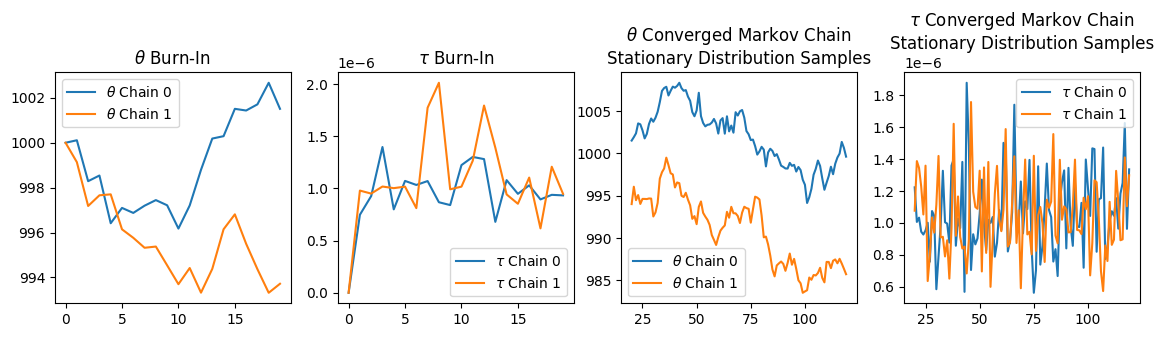

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
alpha = 2  # Hyperparameter for Gamma prior
lambda_param = 1  # Hyperparameter for Gamma prior

# Gibbs sampler
for c in range(C):
    for g in range(1, G):
        # Update tau using Gamma posterior
        shape = alpha / 2 + n / 2
        rate = lambda_param / 2 + 0.5 * np.sum((x - theta[c, g - 1]) ** 2)
        tau[c, g] = stats.gamma(a=shape, scale=1 / rate).rvs()

        # Update theta using Normal posterior
        tau_factor = tau[c, g] * n
        mean_theta = (np.mean(x) * tau_factor + theta[c, g - 1]) / (tau_factor + 1)
        std_theta = (1 / (tau_factor + 1)) ** 0.5
        theta[c, g] = stats.norm(loc=mean_theta, scale=std_theta).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();


Set $\alpha$ = 5 and $\lambda$ = 0.5

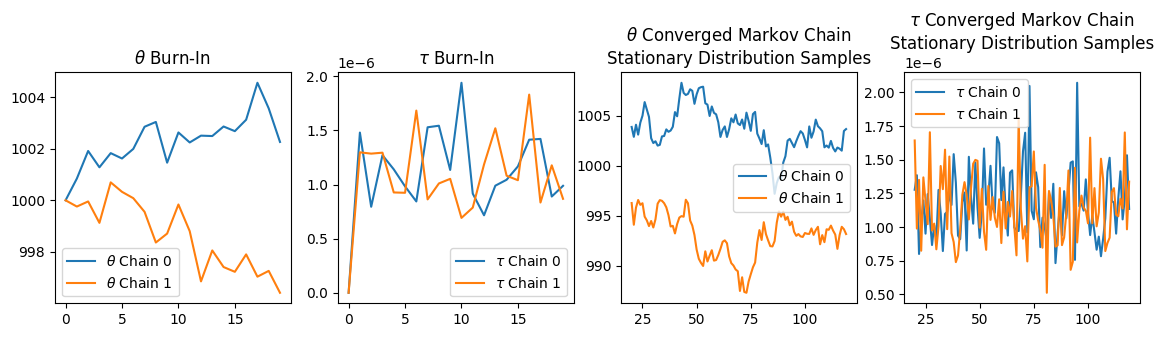

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# loc is mean and scale is standard deviation
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
alpha = 5  # Hyperparameter for Gamma prior
lambda_param = 0.5  # Hyperparameter for Gamma prior

# Gibbs sampler
for c in range(C):
    for g in range(1, G):
        # Update tau using Gamma posterior
        shape = alpha / 2 + n / 2
        rate = lambda_param / 2 + 0.5 * np.sum((x - theta[c, g - 1]) ** 2)
        tau[c, g] = stats.gamma(a=shape, scale=1 / rate).rvs()

        # Update theta using Normal posterior
        tau_factor = tau[c, g] * n
        mean_theta = (np.mean(x) * tau_factor + theta[c, g - 1]) / (tau_factor + 1)
        std_theta = (1 / (tau_factor + 1)) ** 0.5
        theta[c, g] = stats.norm(loc=mean_theta, scale=std_theta).rvs()

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();


# Q3:

In this problem, we aim to analyze the posterior distribution of $\lambda$ given a set of observed data $X_{1}$,$X_{2}$...$X_{n}$ drawn i.i.d. from a Bernoulli distribution with parameter $\theta$. The parameter $\theta$ is assumed to follow a Beta distribution prior with parameters
$\alpha$ and $\beta$. Using Bayes' theorem, we calculate the posterior distribution as the product of the likelihood and the prior, normalized by the marginal likelihood.

The likelihood function for the Bernoulli data is given by:$$
p(x_1, \dots, x_n \mid \theta) = \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1 - x_i}
$$
which simplifies to:$$
p(x_1, \dots, x_n \mid \theta) = \theta^S (1 - \theta)^{n - S}
$$
The Beta prior for $\lambda$  is defined as:$$
p(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

where $B(\alpha,\beta)$ is the Beta function, ensuring the distribution integrates to 1. Combining the prior and likelihood using Bayes' theorem, the posterior distribution for $\theta$ is proportional to:$$
p(\theta \mid x_1, \dots, x_n) \propto p(x_1, \dots, x_n \mid \theta) \cdot p(\theta)
$$
which simplifies to:$$
p(\theta \mid x_1, \dots, x_n) \propto \theta^{S + \alpha - 1} (1 - \theta)^{n - S + \beta - 1}
$$
Recognizing this as the kernel of a Beta distribution, we conclude that the posterior distribution is:
$$
p(\theta \mid x_1, \dots, x_n) \sim \text{Beta}(\alpha + S, \beta + n - S)
$$

This result demonstrates the conjugacy of the Beta prior with the Bernoulli likelihood, as the posterior distribution is also a Beta distribution. By updating the prior parameters $\alpha$ and $\beta$ with the observed successes
$S$ and failures $n-S$, we effectively incorporate the data into our belief about $\lambda$. This property of conjugacy simplifies Bayesian inference significantly.

Set $\alpha$ = 2 and $\beta$ = 2

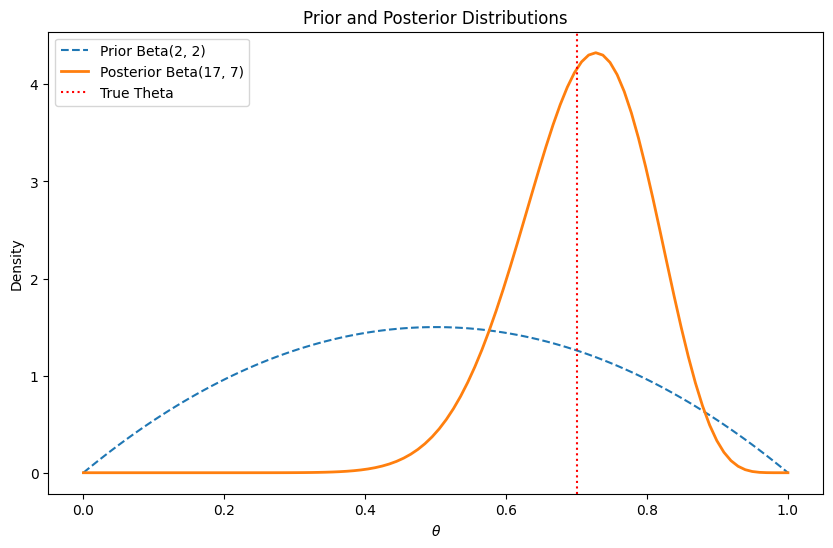

In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Simulate Bernoulli data
n = 20  # Number of trials
theta_true = 0.7  # True success probability
x = np.random.binomial(1, theta_true, size=n)  # Observed data

# Prior parameters
alpha_prior = 2  # Shape parameter alpha
beta_prior = 2  # Shape parameter beta

# Sufficient statistic: Number of successes
S = np.sum(x)

# Posterior parameters
alpha_post = alpha_prior + S
beta_post = beta_prior + n - S

# Generate values for theta
theta = np.linspace(0, 1, 100)

# Compute prior and posterior distributions
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_pdf, label=f'Prior Beta({alpha_prior}, {beta_prior})', linestyle='--')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({alpha_post}, {beta_post})', linewidth=2)
plt.axvline(theta_true, color='red', linestyle=':', label='True Theta')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions')
plt.legend()
plt.show()


In Bayesian inference, the core idea is to update our beliefs using data to form a posterior distribution. However, in practice, we often rely on sampling methods like MCMC to generate samples from the posterior rather than working with its explicit functional form. These samples allow us to visualize the distribution using histograms and make probabilistic statements, such as credible intervals, without needing an analytical solution. This approach emphasizes practicality and flexibility, especially for complex models where exact solutions are difficult or impossible to derive.